In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv("Salaries.csv")
Data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
Data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [4]:
Data.shape

(397, 6)

In [5]:
Data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
Data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


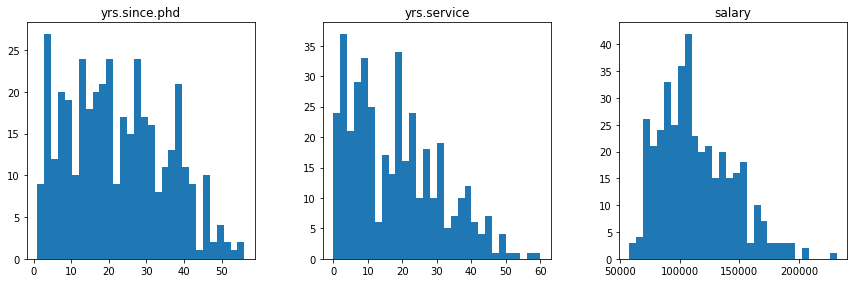

In [7]:
Data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30);

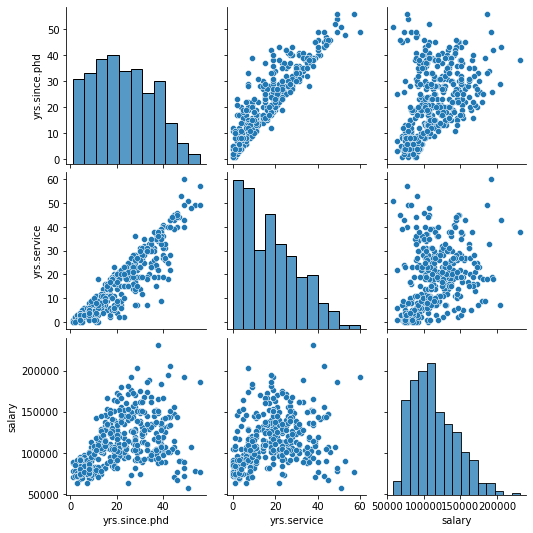

In [8]:
sns.pairplot(Data);

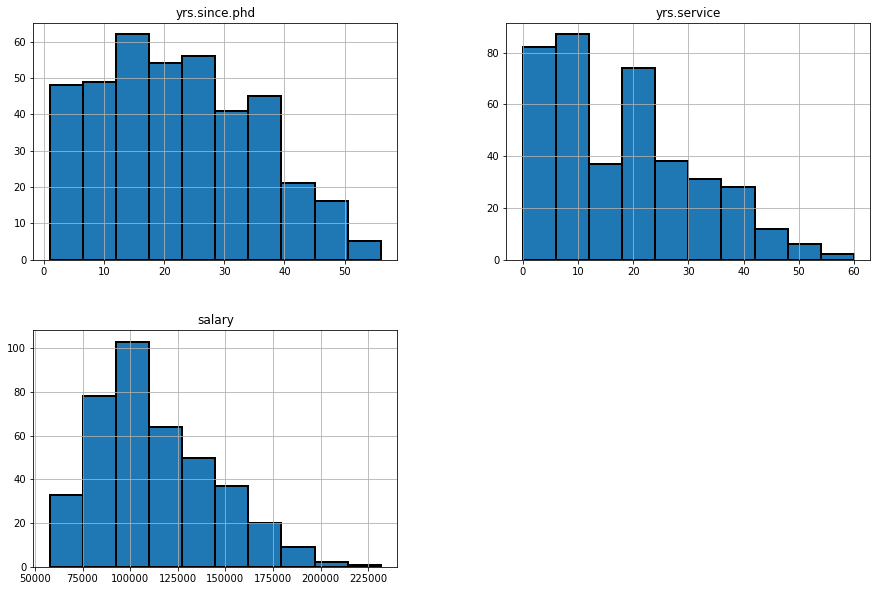

In [11]:
Data.hist(edgecolor="black",linewidth= 2, figsize= (15,10));

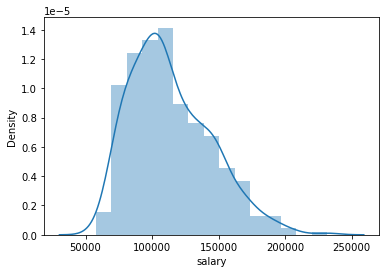

In [12]:
sns.distplot(Data['salary']);

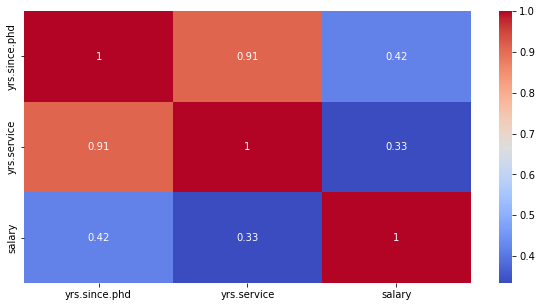

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(Data.corr(),annot = True, cmap = "coolwarm")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
Data['rank']=LE.fit_transform(Data['rank'])
Data['discipline']=LE.fit_transform(Data['discipline'])
Data['sex']=LE.fit_transform(Data['sex'])

In [15]:
#Data = Data.drop(["sex"], axis = 1)
#Data = Data.drop(["discipline"], axis = 1)

In [16]:
Data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


In [17]:
X = Data.drop(["salary"], axis = 1)
Y = Data["salary"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,shuffle=True)

In [19]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [20]:
Y_pred = RFR.predict(X_test)

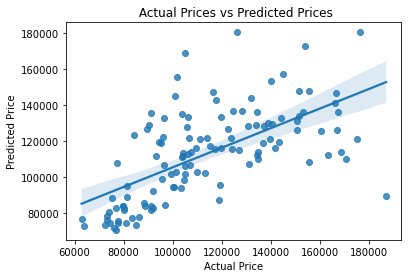

In [21]:
sns.regplot(data=Data, x =Y_test, y = Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [22]:
MAE_RD = mean_absolute_error(Y_test,Y_pred)
MSE_RD = mean_squared_error(Y_test,Y_pred)
RMSE_RD = np.sqrt(MSE_RD)

In [23]:
MAE_RD

16817.836694808204

In [24]:
MSE_RD

560632676.1653405

In [25]:
RMSE_RD

23677.683082711883

In [26]:
Data.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329
396,1,0,8,4,1,81035


In [49]:
print('Salary Prediction:-- ',RFR.predict([[2,0,31,19,1]]))

Salary Prediction:--  [138978.8125]


In [29]:
print('RandomForestRegressor train score is ',RFR.score(X_train,Y_train))
print('RandomForestRegressor test score is ',RFR.score(X_test,Y_test))

RandomForestRegressor train score is  0.8539605540815468
RandomForestRegressor test score is  0.3425088910271409


In [45]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [51]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = DTC.predict(X_test)

In [48]:
print('Salary Prediction:-- ',DTC.predict([[2,0,31,19,1]]))

Salary Prediction:--  [150564]


In [50]:
print('DecisionTreeClassifier train score is ',DTC.score(X_train,Y_train))
print('DecisionTreeClassifier test score is ',DTC.score(X_test,Y_test))

DecisionTreeClassifier train score is  0.8953068592057761
DecisionTreeClassifier test score is  0.016666666666666666
